## Quantitative modelling of TXTL- E.coli and reporter gene 

https://www.nature.com/articles/s41598-019-48468-8#Sec10
https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-019-48468-8/MediaObjects/41598_2019_48468_MOESM1_ESM.pdf

In [1]:
import sympy
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
import seaborn as sn

Model the rate of protein synthesis with assumptions of quasi steady state for 3 MM constants - KM, 70 (mRNA transcription), KM, m (RNA degradation), K M,R (protein translation) and conservation laws for total RNA polymerase (free, bound with sigma 70 factor and transcription on mRNA) and total ribosome concentration (free and performing translation on mRNA)

In [2]:
# biochemical constants that best fit the data (deGFP vs plasmid)
kcat_m = 0.065 # P70 transcription rate 
KM_70 = 1 # MM constant for mRNA transcription
k70 = 0.26 # dissociation constant sigma70 and RNA poly.
S70 = 30 # total concentration of Sigma70 
kd_m = 6.6 # mRNA degradation
KM_m = 8000 # MM constant for RNA degradation
Etot = 400 # total concentration of active RNA poly.
Cm = 10 # rate of transcription
Lm = 800 # length of mRNA 
Kcat_p = 0.006 
KM_R = 10 # MM constant for translation
kmat = 0.000725 # Rate of protein maturation
Rtot = 1100 # total concentration of ribosome
Cp = 2.5 # rate of translation 

In [3]:
# different conc. of promoter specific to sigma 70
P70 = [0,0.1,0.2,0.5,1,2.5,5,7.5,10,15,20,30] # only P70a 

In [4]:
# mRNA concentration steady state 
m_SS = [] 
for i in range(len(P70)):
    m_SS.append((kcat_m/kd_m)*P70[i]) 
#problem is that this is only steady state so can only be applied for second phase 

In [5]:
m_SS

[0.0,
 0.000984848484848485,
 0.00196969696969697,
 0.004924242424242425,
 0.00984848484848485,
 0.024621212121212124,
 0.04924242424242425,
 0.07386363636363637,
 0.0984848484848485,
 0.14772727272727273,
 0.196969696969697,
 0.29545454545454547]

In [6]:
# solve for E0 and R0 from Etotal and Rtotal for conservation law of total ribosome (R0, Rm) and RNA poly (E0,S70,Em)
sol_E0_list, sol_R0_list = [],[]
final_val = {}
for i in range(len(P70)):
    E0 = symbols("E0")
    eq1 = Eq(E0 +E0*S70/(k70+E0)+E0*S70*P70[i]/(E0*S70+KM_70*(k70+E0))*(1+kcat_m*(Lm/Cm))-Etot)
    sol = solve(eq1)
    sol_E0 = int(sol[-1])
    sol_E0_list.append(sol_E0)
    
    R0 = symbols("R0")
    eq2 = Eq(R0+(R0*m_SS[i]/KM_R+R0)*(1+Kcat_p*(Lm/Cp))-Rtot)
    sol_R0 = int(solve(eq2)[0])
    sol_R0_list.append(sol_R0)
    
    final_val[P70[i]]=sol_E0,sol_R0

C:\Users\szest\anaconda3\lib\site-packages\sympy\core\relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


In [7]:
final_val

{0: (370, 280),
 0.1: (369, 280),
 0.2: (368, 280),
 0.5: (367, 280),
 1: (364, 280),
 2.5: (355, 280),
 5: (340, 279),
 7.5: (325, 279),
 10: (310, 278),
 15: (280, 277),
 20: (250, 276),
 30: (190, 274)}

In [8]:
deGFPdark = []
# for low plasmic concentrations- lower than 1
for i in range(len(P70[:4])):
    deGFPdark.append((Kcat_p*kcat_m/kd_m)*P70[i])
# for steady state so >1 plasmid concentration
for i in range(len(P70[4:])):
    deGFPdark.append((Kcat_p/kmat)*m_SS[i+4]*(1/(1+KM_R/sol_R0_list[i+4])))

In [9]:
deGFPdark

[0.0,
 5.909090909090911e-06,
 1.1818181818181822e-05,
 2.9545454545454552e-05,
 0.07869419522213815,
 0.19673548805534538,
 0.3934223514225902,
 0.5901335271338852,
 0.7867467781260886,
 1.17997225650716,
 1.5730977486463384,
 2.359044549428231]

In [10]:
dm,ddeGFPdark,ddeGFPmat = [],[],[]

for i in range(len(P70)):
    dm.append(kcat_m*P70[i]*((sol_E0_list[i]*S70)/KM_70*(k70+sol_E0_list[i])+sol_E0_list[i]*S70)-kd_m*(m_SS[i]/KM_m+m_SS[i]))
    ddeGFPdark.append(Kcat_p*m_SS[i]*sol_R0_list[i]/(KM_R+sol_R0_list[i])-kmat*deGFPdark[i])
    ddeGFPmat.append(kmat*deGFPdark[i])

In [11]:
dm

[0.0,
 26642.051799187502,
 52996.182198375005,
 131772.60199593753,
 259261.48299187497,
 616552.2999796876,
 1131276.5749593752,
 1550754.0749390628,
 1881566.04991875,
 2303518.4248781255,
 2449783.6998375,
 2125852.9497562503]

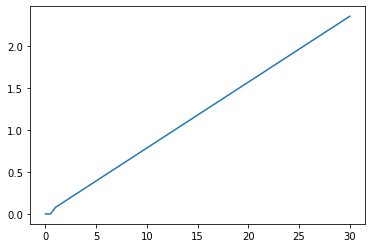

In [247]:
plt.plot(P70,deGFPdark)

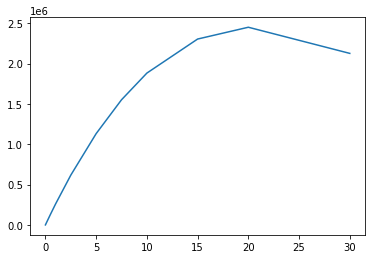

In [250]:
plt.plot(P70,dm)

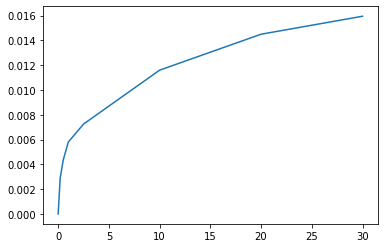

In [249]:
plt.plot(P70,deGFPmat)